# Table of Galaxy Groups Below 3500 $km s^{-1}$
 
Info on table https://iopscience.iop.org/article/10.3847/1538-4357/aa76db#apjaa76dbt2 (table 2)

Got code and file from: https://github.com/DESI-UR/DESI_SGA/blob/master/TF/apjaa7dbt2_mrt.ipynb

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from astropy.table import Table
from astropy.coordinates import SkyCoord

from astropy import constants as const
from astropy import units as u


In [2]:
mpl.rc('font', size=14)

## Importing Dwarf Galaxy Table

In [3]:
dwarf_table = Table.read('dwarf_table.txt', format = 'ascii.commented_header')
dwarf_table[:5]

aimc,IN_DR7_LSS,RA,DEC,Z,ELPETRO_ABSMAG_r,u_r,sSFR,HImass,flag3727,t3,Z12logOH,Zerr,logNO,NOerr,vflag_VF,ID,2D_neighbor_ID,2D_neighbor_dist,2D_neighbor_ID_vir,2D_neighbor_dist_vir,3D_neighbor_ID,3D_neighbor_dist,3D_neighbor_ID_vir,3D_neighbor_dist_vir
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32,int32,int32,float64,int32,float64,int32,float64,int32,float64
0.0,1.0,147.17645340393182,-0.3540349522432606,0.006282840855419636,-15.534673690795898,1.5979467332363129,-9.897252082824707,nan,nan,nan,nan,nan,nan,nan,2,12,49,0.18150554228021565,585714,1.3634632510011546,573,0.3210655024172438,208,2.3657856725525463
106.68,1.0,146.85676432411947,-0.27409664376066756,0.02196459472179413,-16.7003231048584,1.6220477223396301,-9.639364242553711,nan,nan,nan,nan,nan,nan,nan,2,31,79,0.6704515586457357,92,2.414294367856323,80,0.9556330809587631,585700,3.7385754919749274
0.0,1.0,146.19277353258968,-0.6882589506846374,0.004080323036760092,-15.290872573852539,1.220979243516922,-9.548693656921387,nan,nan,nan,nan,nan,nan,nan,2,44,585695,0.035663331434249095,639857,0.46035331496314846,585695,0.221530846641702,585695,2.8927174640703734
199.39,1.0,146.00780426178756,-0.6422574964819474,0.004776299931108952,-15.831652641296387,0.7728094607591629,-7.982375621795654,nan,0.0,1.5717060395681055,7.73051787768279,0.0179600111522654,-0.5320566539047968,0.44255404846002694,2,45,585695,0.006393284307917346,585695,0.08348257342324528,639857,0.6010801341408164,639857,7.109919536505821
0.0,1.0,146.6190367018052,-0.43434631860351913,0.006036635022610426,-16.34455108642578,1.7559601366519928,-9.769034385681152,nan,nan,nan,nan,nan,nan,nan,2,49,585714,0.07059729101415332,585714,0.4172620229334301,585714,0.3596492056527832,585714,2.125689993784549


## Reading in Groups Data

In [4]:
groups = Table.read(r'C:\Users\caeho\OneDrive\Documents\University of Rochester REU\apjaa76dbt2_mrt.txt',
                    format='ascii.fixed_width_no_header',
                    names=['PGC1', 'PGC1+', 'Mem', 'GLON', 'GLAT', 'SGL', 'SGB', 'Ksmag', 'logK', 'Vh', 'VLS', 'ND', 'D', 'errD', 'sigmaL', 'sigmaV', 'R2t', 'Rg', 'logMk', 'logMd'],
                    col_starts=np.asarray([1, 9, 17, 21, 30, 39, 48, 57, 63, 69, 74, 79, 83, 89, 92, 96, 100, 106, 112, 119])-1,
                   )

In [5]:
groups

PGC1,PGC1+,Mem,GLON,GLAT,SGL,SGB,Ksmag,logK,Vh,VLS,ND,D,errD,sigmaL,sigmaV,R2t,Rg,logMk,logMd
int32,int32,int32,float64,float64,float64,float64,float64,float64,int32,int32,int32,float64,int32,int32,int32,float64,float64,float64,float64
43296,43296,191,302.2241,21.6465,156.3251,-11.5819,4.61,12.71,3407,3142,59,36.96,3,595,800,1.612,0.893,14.624,14.717
46618,43296,30,307.8738,19.2865,159.6426,-6.8008,6.07,12.11,3340,3086,5,37.57,7,350,307,0.95,0.745,13.936,13.808
45174,43296,34,306.0424,32.5707,146.1941,-6.0422,6.42,11.96,3292,3059,4,44.03,8,307,300,0.833,0.693,13.764,13.756
40498,43296,24,297.5648,23.0823,153.9019,-15.4648,6.48,11.92,3258,2986,4,28.45,6,296,170,0.801,0.607,13.713,13.207
43557,43296,22,302.9333,36.4075,141.8602,-7.7062,6.82,11.81,3296,3066,7,39.89,8,267,163,0.724,0.428,13.582,13.017
46409,43296,12,307.9495,14.9305,163.9909,-7.402,6.96,11.7,3148,2889,4,33.18,8,243,174,0.659,0.399,13.459,13.045
45466,43296,22,307.803,38.9261,140.2186,-3.4022,7.42,11.48,2995,2783,2,38.06,12,201,118,0.544,0.444,13.21,12.747
49424,43296,7,313.8107,13.0725,166.6082,-2.0176,7.43,11.41,2833,2591,1,33.88,18,189,130,0.513,0.391,13.134,12.782
49106,43296,8,312.8342,12.8475,166.7144,-2.9897,7.65,11.4,3066,2820,1,30.06,18,187,97,0.507,0.204,13.117,12.243


### Adding ID number like I had for NSA galaxy table

In [6]:
#Adding ID number like I had for NSA galaxy table

groups['ID'] = [i for i in range(len(groups))]
groups[:5]



PGC1,PGC1+,Mem,GLON,GLAT,SGL,SGB,Ksmag,logK,Vh,VLS,ND,D,errD,sigmaL,sigmaV,R2t,Rg,logMk,logMd,ID
int32,int32,int32,float64,float64,float64,float64,float64,float64,int32,int32,int32,float64,int32,int32,int32,float64,float64,float64,float64,int32
43296,43296,191,302.2241,21.6465,156.3251,-11.5819,4.61,12.71,3407,3142,59,36.96,3,595,800,1.612,0.893,14.624,14.717,0
46618,43296,30,307.8738,19.2865,159.6426,-6.8008,6.07,12.11,3340,3086,5,37.57,7,350,307,0.95,0.745,13.936,13.808,1
45174,43296,34,306.0424,32.5707,146.1941,-6.0422,6.42,11.96,3292,3059,4,44.03,8,307,300,0.833,0.693,13.764,13.756,2
40498,43296,24,297.5648,23.0823,153.9019,-15.4648,6.48,11.92,3258,2986,4,28.45,6,296,170,0.801,0.607,13.713,13.207,3
43557,43296,22,302.9333,36.4075,141.8602,-7.7062,6.82,11.81,3296,3066,7,39.89,8,267,163,0.724,0.428,13.582,13.017,4


## Removing groups with blank distance values

In [7]:
mask = groups['D'].mask == False   #removing objects dont have a D value
groups = groups[mask]

groups[:10]
#len(groups)

PGC1,PGC1+,Mem,GLON,GLAT,SGL,SGB,Ksmag,logK,Vh,VLS,ND,D,errD,sigmaL,sigmaV,R2t,Rg,logMk,logMd,ID
int32,int32,int32,float64,float64,float64,float64,float64,float64,int32,int32,int32,float64,int32,int32,int32,float64,float64,float64,float64,int32
43296,43296,191,302.2241,21.6465,156.3251,-11.5819,4.61,12.71,3407,3142,59,36.96,3,595,800,1.612,0.893,14.624,14.717,0
46618,43296,30,307.8738,19.2865,159.6426,-6.8008,6.07,12.11,3340,3086,5,37.57,7,350,307,0.95,0.745,13.936,13.808,1
45174,43296,34,306.0424,32.5707,146.1941,-6.0422,6.42,11.96,3292,3059,4,44.03,8,307,300,0.833,0.693,13.764,13.756,2
40498,43296,24,297.5648,23.0823,153.9019,-15.4648,6.48,11.92,3258,2986,4,28.45,6,296,170,0.801,0.607,13.713,13.207,3
43557,43296,22,302.9333,36.4075,141.8602,-7.7062,6.82,11.81,3296,3066,7,39.89,8,267,163,0.724,0.428,13.582,13.017,4
46409,43296,12,307.9495,14.9305,163.9909,-7.402,6.96,11.7,3148,2889,4,33.18,8,243,174,0.659,0.399,13.459,13.045,5
45466,43296,22,307.803,38.9261,140.2186,-3.4022,7.42,11.48,2995,2783,2,38.06,12,201,118,0.544,0.444,13.21,12.747,6
49424,43296,7,313.8107,13.0725,166.6082,-2.0176,7.43,11.41,2833,2591,1,33.88,18,189,130,0.513,0.391,13.134,12.782,7
49106,43296,8,312.8342,12.8475,166.7144,-2.9897,7.65,11.4,3066,2820,1,30.06,18,187,97,0.507,0.204,13.117,12.243,8


### Distance Method #1: 2D Distance 

Calculating the relative velocity b/t each dwarf galaxy amd group

Equation to calculate relative velocity: $v_{rel} = |z_{a} - z_{b}|c$

All neighbors galaxies have a maximum relative velocity: $v_{rel} < 300  km/s$

In [8]:
# Haven't figured out how to do the relative velocity cut

### Distance Method #2: 3D Distance

In [9]:
# Code I was testing to try to do a membership cut (Not needed for this research?)

'''

for i in range(10): #len(dwarf_table)):
    
    #distances to systems
    dwarf_r = const.c.to('km/s')*dwarf_table['Z'][i]/H0 
    
    group_r = groups['D']*u.Mpc

    
    #galaxy positions to calcuate their separation
    dwarf_pos = SkyCoord(ra=dwarf_table['RA'][i]*u.degree, dec=dwarf_table['DEC'][i]*u.degree, distance=dwarf_r)
    group_pos = SkyCoord(ra=groups['GLON']*u.degree, 
                            dec=groups['GLAT']*u.degree, distance=group_r)
    group_sep_dist=group_pos.separation_3d(dwarf_pos)
    
    #Adding group membership conditions
    
    #calcuate velocity of dwarf galaxy and group
    v_dwarf = const.c.to('km/s')*dwarf_table['Z'][i]
    v_group = groups['Vh']*u.km/u.s
    
    group_sigmaV = groups['sigmaV']*u.km/u.s
    group_radius = groups['R2t']*u.Mpc
    
    
    di = ~((abs(v_dwarf - v_group) <= 3*group_sigmaV) & (group_sep_dist <= 1.5*group_radius))
    groups[di] = False
    #di = ~(group_sep_dist <= 1.5*group_radius)
    #groups[di] = False
    
    #galaxy positions to calcuate their separation excluding group membership 
    dwarf_pos = SkyCoord(ra=dwarf_table['RA'][i]*u.degree, dec=dwarf_table['DEC'][i]*u.degree, distance=dwarf_r)
    group_pos = SkyCoord(ra=groups['GLON'][di]*u.degree, 
                            dec=groups['GLAT'][di]*u.degree, distance=group_r)
    group_sep_dist2=group_pos.separation_3d(dwarf_pos)
    
    
    nearby_neigh_index = np.argmin(group_sep_dist2) #finding the nearest neighbor
    
    
    
    dwarf_table['3D_group_dist'][i] = group_sep_dist2[nearby_neigh_index].value #unit Mpc
     
    neighbor_id = groups['ID'][di] 
    dwarf_table['3D_group_ID'][i] = neighbor_id[nearby_neigh_index] #ID# of the closest neighbor galaxy
    
    
    #testing
    if (abs(v_dwarf - v_group) <= 3*group_sigmaV) & (group_sep_dist <= 1.5*group_radius):
    
        nearby_neigh_index = np.argmin(group_sep_dist) #finding the nearest neighbor
        dwarf_table['3D_group_dist'][i] = group_sep_dist[nearby_neigh_index].value #unit Mpc
        neighbor_id = groups['ID'] 
        dwarf_table['3D_group_ID'][i] = neighbor_id[nearby_neigh_index] #ID# of the closest neighbor galaxy

    # Doing calculation with virial radius normalization
''';
    

In [10]:
'''

from astropy import constants as const
from astropy import units as u
from astropy.coordinates import SkyCoord


dwarf_table['member'] = np.nan

for i in range(10): #len(dwarf_table)):
    
    
    #Adding group membership conditions
    
    #calcuate velocity of dwarf galaxy and group
    v_dwarf = const.c.to('km/s')*dwarf_table['Z'][i]
    v_group = groups['Vh']*u.km/u.s
    
    group_sigmaV = groups['sigmaV']*u.km/u.s
    group_radius = groups['R2t']*u.Mpc
    
    #if (group_sep_dist <= 1.5*group_radius).any():
        #dwarf_table['member']= Y
        
    
    di = ~((abs(v_dwarf - v_group) <= 3*group_sigmaV) & (group_sep_dist <= 1.5*group_radius))
     
    groups[di] = False
    
    #galaxy positions to calcuate their separation excluding group membership 
    dwarf_pos = SkyCoord(ra=dwarf_table['RA'][i]*u.degree, dec=dwarf_table['DEC'][i]*u.degree, distance=dwarf_r)
    group_pos = SkyCoord(ra=groups['GLON'][di]*u.degree, 
                            dec=groups['GLAT'][di]*u.degree, distance=group_r)
    group_sep_dist2=group_pos.separation_3d(dwarf_pos)
    
    
    nearby_neigh_index = np.argmin(group_sep_dist2) #finding the nearest neighbor
    
    
    dwarf_table['3D_group_dist'][i] = group_sep_dist2[nearby_neigh_index].value #unit Mpc
     
    neighbor_id = groups['ID'][di] 
    dwarf_table['3D_group_ID'][i] = neighbor_id[nearby_neigh_index] #ID# of the closest neighbor galaxy
    
    
    #testing
    if (abs(v_dwarf - v_group) <= 3*group_sigmaV) & (group_sep_dist <= 1.5*group_radius):
    
        nearby_neigh_index = np.argmin(group_sep_dist) #finding the nearest neighbor
        dwarf_table['3D_group_dist'][i] = group_sep_dist[nearby_neigh_index].value #unit Mpc
        neighbor_id = groups['ID'] 
        dwarf_table['3D_group_ID'][i] = neighbor_id[nearby_neigh_index] #ID# of the closest neighbor galaxy

''';
   

## Removing H0 = 75 dependance from Group Table (D_h)

In [11]:
#making D in terms of h
H0_group = 75*u.km/u.s/u.Mpc
h=1
H0 = 100*h*u.km/u.s/u.Mpc #Hubble's Constant

groups['D_h'] = np.nan

for i in range(len(groups)):
    groups['D_h'][i] = groups['D'][i]*H0_group/(h*H0)

## New Table group_Rg 

Only includes groups that have both D values and Rg (virial radius) values

In [12]:
mask = groups['Rg'].mask == False   #removing objects dont have a virial radius value
groups_Rg = groups[mask]

In [13]:
groups_Rg[:5]


PGC1,PGC1+,Mem,GLON,GLAT,SGL,SGB,Ksmag,logK,Vh,VLS,ND,D,errD,sigmaL,sigmaV,R2t,Rg,logMk,logMd,ID,D_h
int32,int32,int32,float64,float64,float64,float64,float64,float64,int32,int32,int32,float64,int32,int32,int32,float64,float64,float64,float64,int32,float64
43296,43296,191,302.2241,21.6465,156.3251,-11.5819,4.61,12.71,3407,3142,59,36.96,3,595,800,1.612,0.893,14.624,14.717,0,27.72
46618,43296,30,307.8738,19.2865,159.6426,-6.8008,6.07,12.11,3340,3086,5,37.57,7,350,307,0.95,0.745,13.936,13.808,1,28.1775
45174,43296,34,306.0424,32.5707,146.1941,-6.0422,6.42,11.96,3292,3059,4,44.03,8,307,300,0.833,0.693,13.764,13.756,2,33.0225
40498,43296,24,297.5648,23.0823,153.9019,-15.4648,6.48,11.92,3258,2986,4,28.45,6,296,170,0.801,0.607,13.713,13.207,3,21.3375
43557,43296,22,302.9333,36.4075,141.8602,-7.7062,6.82,11.81,3296,3066,7,39.89,8,267,163,0.724,0.428,13.582,13.017,4,29.9175


## Finding Distances to nearest group w/ H0 = 100h

### 3D distance method H0 = 100h

In [14]:
#attempting to use D_h as distance instead

from astropy import constants as const
from astropy import units as u
from astropy.coordinates import SkyCoord


#creating the new columns
dwarf_table['3D_group_ID_h'] = -1
dwarf_table['3D_group_dist_h'] = np.nan


#dwarf_table['member'] = np.nan

h=1
H0 = 100*h*u.km/u.s/u.Mpc #Hubble's Constant
#H0 = 75*u.km/u.s/u.Mpc


for i in range(len(dwarf_table)):
    
    #distances to systems
    dwarf_r = const.c.to('km/s')*dwarf_table['Z'][i]/H0 
    group_r = groups['D_h']*u.Mpc

    
    #galaxy positions to calcuate their separation
    dwarf_pos = SkyCoord(ra=dwarf_table['RA'][i]*u.degree, dec=dwarf_table['DEC'][i]*u.degree, distance=dwarf_r)
    group_pos = SkyCoord(ra=groups['GLON']*u.degree, 
                            dec=groups['GLAT']*u.degree, distance=group_r)
    group_sep_dist=group_pos.separation_3d(dwarf_pos)
    

    nearby_neigh_index = np.argmin(group_sep_dist) #finding the nearest neighbor
    dwarf_table['3D_group_dist_h'][i] = group_sep_dist[nearby_neigh_index].value #unit Mpc
    neighbor_id = groups['ID'] 
    dwarf_table['3D_group_ID_h'][i] = neighbor_id[nearby_neigh_index] #ID# of the closest neighbor galaxy
    

### 3D Vir Distance w/ H0 = 100h

In [15]:
#virial normalization but with H0 = 100h

#columns for virial radius normalization 
dwarf_table['3D_group_ID_vir_h'] = -1
dwarf_table['3D_group_dist_vir_h'] = np.nan


h=1
H0 = 100*h*u.km/u.s/u.Mpc #Hubble's Constant
#H0 = 75*u.km/u.s/u.Mpc


for i in range(len(dwarf_table)):
    
    #distances to systems
    dwarf_r = const.c.to('km/s')*dwarf_table['Z'][i]/H0 
    group_r = groups_Rg['D_h']*u.Mpc

    
    #galaxy positions to calcuate their separation
    dwarf_pos = SkyCoord(ra=dwarf_table['RA'][i]*u.degree, dec=dwarf_table['DEC'][i]*u.degree, distance=dwarf_r)
    group_pos = SkyCoord(ra=groups_Rg['GLON']*u.degree, 
                            dec=groups_Rg['GLAT']*u.degree, distance=group_r)
    group_sep_dist=group_pos.separation_3d(dwarf_pos)
    

    
    r_vir = groups_Rg['Rg'] # calculating virial radius of all neighboring galaxies
    
    
    group_sep_dist_vir = group_sep_dist / r_vir # normalizing distance
    

    
    nearby_neigh_index_vir = np.nanargmin(group_sep_dist_vir) #finding closest neighbor with normalized virial distance
    
    dwarf_table['3D_group_dist_vir_h'][i] = group_sep_dist_vir[nearby_neigh_index_vir].value #unit , adding to dwarf table
    
    
    neighbor_id = groups_Rg['ID']
    dwarf_table['3D_group_ID_vir_h'][i] = neighbor_id[nearby_neigh_index_vir] #adding neighbor galaxy's ID to dwarf table
    

## Finding Distances to nearest group w/ H0 = 75 km/s/Mpc

### 3D distance method H0 = 75

In [16]:
from astropy import constants as const
from astropy import units as u
from astropy.coordinates import SkyCoord


#creating the new columns
dwarf_table['3D_group_ID'] = -1
dwarf_table['3D_group_dist'] = np.nan


#h=1
#H0 = 100*h*u.km/u.s/u.Mpc #Hubble's Constant
H0 = 75*u.km/u.s/u.Mpc


for i in range(len(dwarf_table)):
    
    #distances to systems
    dwarf_r = const.c.to('km/s')*dwarf_table['Z'][i]/H0 
    group_r = groups['D']*u.Mpc

    
    #galaxy positions to calcuate their separation
    dwarf_pos = SkyCoord(ra=dwarf_table['RA'][i]*u.degree, dec=dwarf_table['DEC'][i]*u.degree, distance=dwarf_r)
    group_pos = SkyCoord(ra=groups['GLON']*u.degree, 
                            dec=groups['GLAT']*u.degree, distance=group_r)
    group_sep_dist=group_pos.separation_3d(dwarf_pos)
    

    nearby_neigh_index = np.argmin(group_sep_dist) #finding the nearest neighbor
    dwarf_table['3D_group_dist'][i] = group_sep_dist[nearby_neigh_index].value #unit Mpc
    neighbor_id = groups['ID'] 
    dwarf_table['3D_group_ID'][i] = neighbor_id[nearby_neigh_index] #ID# of the closest neighbor galaxy
    
    
    # Had to separate virial calculation into different cell b/c not all the groups with D values also had Rg values
    '''
    # Doing calculation with virial radius normalization
    
    r_vir = groups_Rg['Rg'] # calculating virial radius of all neighboring galaxies
    
    group_sep_dist_vir = group_sep_dist / r_vir # normalizing distance
    
    nearby_neigh_index_vir = np.nanargmin(group_sep_dist_vir) #finding closest neighbor with normalized virial distance
    
    dwarf_table['3D_group_dist_vir'][i] = group_sep_dist_vir[nearby_neigh_index_vir].value #unit , adding to dwarf table
    
    
    neighbor_id = groups['ID']
    dwarf_table['3D_group_ID_vir'][i] = neighbor_id[nearby_neigh_index_vir] #adding neighbor galaxy's ID to dwarf table
    
    '''

In [17]:
dwarf_table[:10]

aimc,IN_DR7_LSS,RA,DEC,Z,ELPETRO_ABSMAG_r,u_r,sSFR,HImass,flag3727,t3,Z12logOH,Zerr,logNO,NOerr,vflag_VF,ID,2D_neighbor_ID,2D_neighbor_dist,2D_neighbor_ID_vir,2D_neighbor_dist_vir,3D_neighbor_ID,3D_neighbor_dist,3D_neighbor_ID_vir,3D_neighbor_dist_vir,3D_group_ID_h,3D_group_dist_h,3D_group_ID_vir_h,3D_group_dist_vir_h,3D_group_ID,3D_group_dist
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32,int32,int32,float64,int32,float64,int32,float64,int32,float64,int32,float64,int32,float64,int32,float64
0.0,1.0,147.17645340393182,-0.3540349522432606,0.006282840855419636,-15.534673690795898,1.5979467332363129,-9.897252082824707,nan,nan,nan,nan,nan,nan,nan,2,12,49,0.18150554228021565,585714,1.3634632510011546,573,0.3210655024172438,208,2.3657856725525463,4606,3.86188777204643,2692,1.5943152130352076,4606,5.149183696061907
106.68,1.0,146.85676432411947,-0.27409664376066756,0.02196459472179413,-16.7003231048584,1.6220477223396301,-9.639364242553711,nan,nan,nan,nan,nan,nan,nan,2,31,79,0.6704515586457357,92,2.414294367856323,80,0.9556330809587631,585700,3.7385754919749274,2533,26.63213952041381,2692,7.246846472420854,2533,35.50951936055173
0.0,1.0,146.19277353258968,-0.6882589506846374,0.004080323036760092,-15.290872573852539,1.220979243516922,-9.548693656921387,nan,nan,nan,nan,nan,nan,nan,2,44,585695,0.035663331434249095,639857,0.46035331496314846,585695,0.221530846641702,585695,2.8927174640703734,4630,3.1658459107582444,2692,0.8258767077007078,4630,4.221127881010993
199.39,1.0,146.00780426178756,-0.6422574964819474,0.004776299931108952,-15.831652641296387,0.7728094607591629,-7.982375621795654,nan,0.0,1.5717060395681055,7.73051787768279,0.0179600111522654,-0.5320566539047968,0.44255404846002694,2,45,585695,0.006393284307917346,585695,0.08348257342324528,639857,0.6010801341408164,639857,7.109919536505821,4631,3.011741672943171,2692,1.0629378899349247,4631,4.015655563924227
0.0,1.0,146.6190367018052,-0.43434631860351913,0.006036635022610426,-16.34455108642578,1.7559601366519928,-9.769034385681152,nan,nan,nan,nan,nan,nan,nan,2,49,585714,0.07059729101415332,585714,0.4172620229334301,585714,0.3596492056527832,585714,2.125689993784549,4606,3.782882983276875,2692,1.5061904525845367,4606,5.043843977702498
21.37,1.0,146.28299647851426,0.0641463074401177,0.021579895168542862,-16.594152450561523,2.861306369304657,-10.189197540283203,nan,nan,nan,nan,nan,nan,nan,2,91,80,0.038323438909891316,92,0.17226127693210824,92,0.10268810550034341,92,0.3052372880294029,2533,25.298147056800573,2692,7.109623143405416,2533,33.73086274240076
0.0,1.0,145.3209420527222,0.771115298508063,0.00658948952332139,-14.810564994812012,1.925416886806488,-9.748167991638184,nan,0.0,3.57494352664153,7.007952737418975,0.2935407103312847,-0.9956427104372425,0.4090425521885854,2,186,208,0.16133006586884238,208,0.576340261650062,208,0.6516081633066332,208,2.3278241244801396,3002,3.3193479637101215,2692,1.711658907224285,3002,4.42579728494683
-99.0,1.0,145.4212238164792,0.5359777701124617,0.1459859162569046,-14.866592407226562,-3.4473413228988647,nan,nan,nan,nan,nan,nan,nan,nan,9,209,206,0.23624643923335842,206,0.5428900018158784,206,0.53709656480362,206,1.2342380947105809,2897,391.179998075512,2692,52.15452932375059,2897,521.5733307673494
0.0,1.0,146.26576246056774,1.2304320197663696,0.006355164106935263,-14.2352876663208,1.6930833458900452,-9.700735092163086,nan,0.0,4.040375795270858,7.048466376827344,0.3785143362106475,-1.2323400004904403,0.5170923842950506,2,238,55137,0.13915957213413985,55243,0.8924983833408165,55137,0.18685834815465546,208,1.4133282793228592,3002,3.5448655681636927,2692,1.632630868253667,3002,4.726487424218256


### 3D Vir Distance w/ H0 = 75

In [18]:
#columns for virial radius normalization 
dwarf_table['3D_group_ID_vir'] = -1
dwarf_table['3D_group_dist_vir'] = np.nan


#dwarf_table['member'] = np.nan

#h=1
#H0 = 100*h*u.km/u.s/u.Mpc #Hubble's Constant
H0 = 75*u.km/u.s/u.Mpc


for i in range(len(dwarf_table)):
    
    #distances to systems
    dwarf_r = const.c.to('km/s')*dwarf_table['Z'][i]/H0 
    group_r = groups_Rg['D']*u.Mpc

    
    #galaxy positions to calcuate their separation
    dwarf_pos = SkyCoord(ra=dwarf_table['RA'][i]*u.degree, dec=dwarf_table['DEC'][i]*u.degree, distance=dwarf_r)
    group_pos = SkyCoord(ra=groups_Rg['GLON']*u.degree, 
                            dec=groups_Rg['GLAT']*u.degree, distance=group_r)
    group_sep_dist=group_pos.separation_3d(dwarf_pos)
    
    
    
    # Doing calculation with virial radius normalization
    
    r_vir = groups_Rg['Rg'] # calculating virial radius of all neighboring galaxies
    
    
    group_sep_dist_vir = group_sep_dist / r_vir # normalizing distance
    

    
    nearby_neigh_index_vir = np.nanargmin(group_sep_dist_vir) #finding closest neighbor with normalized virial distance
    
    dwarf_table['3D_group_dist_vir'][i] = group_sep_dist_vir[nearby_neigh_index_vir].value #unit , adding to dwarf table
    
    
    neighbor_id = groups_Rg['ID']
    dwarf_table['3D_group_ID_vir'][i] = neighbor_id[nearby_neigh_index_vir] #adding neighbor galaxy's ID to dwarf table
    
    

In [19]:
#groups[17]

In [20]:
groups[647] #The group that shows up for all closest virial calcualtions

PGC1,PGC1+,Mem,GLON,GLAT,SGL,SGB,Ksmag,logK,Vh,VLS,ND,D,errD,sigmaL,sigmaV,R2t,Rg,logMk,logMd,ID,D_h
int32,int32,int32,float64,float64,float64,float64,float64,float64,int32,int32,int32,float64,int32,int32,int32,float64,float64,float64,float64,int32,float64
9332,10123,4,145.1531,-24.8122,335.8323,-9.6931,8.55,9.86,534,722,1,8.67,6,55,17,0.15,8.279,11.529,12.34,2692,6.5025


In [21]:
dwarf_table[:5]

aimc,IN_DR7_LSS,RA,DEC,Z,ELPETRO_ABSMAG_r,u_r,sSFR,HImass,flag3727,t3,Z12logOH,Zerr,logNO,NOerr,vflag_VF,ID,2D_neighbor_ID,2D_neighbor_dist,2D_neighbor_ID_vir,2D_neighbor_dist_vir,3D_neighbor_ID,3D_neighbor_dist,3D_neighbor_ID_vir,3D_neighbor_dist_vir,3D_group_ID_h,3D_group_dist_h,3D_group_ID_vir_h,3D_group_dist_vir_h,3D_group_ID,3D_group_dist,3D_group_ID_vir,3D_group_dist_vir
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32,int32,int32,float64,int32,float64,int32,float64,int32,float64,int32,float64,int32,float64,int32,float64,int32,float64
0.0,1.0,147.17645340393182,-0.3540349522432606,0.006282840855419636,-15.534673690795898,1.5979467332363129,-9.897252082824707,nan,nan,nan,nan,nan,nan,nan,2,12,49,0.18150554228021565,585714,1.3634632510011546,573,0.3210655024172438,208,2.3657856725525463,4606,3.86188777204643,2692,1.5943152130352076,4606,5.149183696061907,2692,2.125753617380277
106.68,1.0,146.85676432411947,-0.27409664376066756,0.02196459472179413,-16.7003231048584,1.6220477223396301,-9.639364242553711,nan,nan,nan,nan,nan,nan,nan,2,31,79,0.6704515586457357,92,2.414294367856323,80,0.9556330809587631,585700,3.7385754919749274,2533,26.63213952041381,2692,7.246846472420854,2533,35.50951936055173,2692,9.662461963227804
0.0,1.0,146.19277353258968,-0.6882589506846374,0.004080323036760092,-15.290872573852539,1.220979243516922,-9.548693656921387,nan,nan,nan,nan,nan,nan,nan,2,44,585695,0.035663331434249095,639857,0.46035331496314846,585695,0.221530846641702,585695,2.8927174640703734,4630,3.1658459107582444,2692,0.8258767077007078,4630,4.221127881010993,2692,1.101168943600944
199.39,1.0,146.00780426178756,-0.6422574964819474,0.004776299931108952,-15.831652641296387,0.7728094607591629,-7.982375621795654,nan,0.0,1.5717060395681055,7.73051787768279,0.0179600111522654,-0.5320566539047968,0.44255404846002694,2,45,585695,0.006393284307917346,585695,0.08348257342324528,639857,0.6010801341408164,639857,7.109919536505821,4631,3.011741672943171,2692,1.0629378899349247,4631,4.015655563924227,2692,1.417250519913233
0.0,1.0,146.6190367018052,-0.43434631860351913,0.006036635022610426,-16.34455108642578,1.7559601366519928,-9.769034385681152,nan,nan,nan,nan,nan,nan,nan,2,49,585714,0.07059729101415332,585714,0.4172620229334301,585714,0.3596492056527832,585714,2.125689993784549,4606,3.782882983276875,2692,1.5061904525845367,4606,5.043843977702498,2692,2.008253936779383


### Attempt to find the relative velocity betweeen each dwarf galaxy and group

In [28]:
'''
dwarf_table['pec_v'] = np.nan

for i in range(10):
    
    v_dwarf = const.c.to('km/s')*dwarf_table['Z'][i]
    v_group = groups['Vh']*u.km/u.s
    dwarf_table['pec_v'][i] = abs(v_dwarf-v_group)
    
dwarf_table[:10]
''';

In [41]:
dwarf_table

aimc,IN_DR7_LSS,RA,DEC,Z,ELPETRO_ABSMAG_r,u_r,sSFR,HImass,flag3727,t3,Z12logOH,Zerr,logNO,NOerr,vflag_VF,ID,2D_neighbor_ID,2D_neighbor_dist,2D_neighbor_ID_vir,2D_neighbor_dist_vir,3D_neighbor_ID,3D_neighbor_dist,3D_neighbor_ID_vir,3D_neighbor_dist_vir,3D_group_ID_h,3D_group_dist_h,3D_group_ID_vir_h,3D_group_dist_vir_h,3D_group_ID,3D_group_dist,3D_group_ID_vir,3D_group_dist_vir
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32,int32,int32,float64,int32,float64,int32,float64,int32,float64,int32,float64,int32,float64,int32,float64,int32,float64
0.0,1.0,147.17645340393182,-0.3540349522432606,0.006282840855419636,-15.534673690795898,1.5979467332363129,-9.897252082824707,nan,nan,nan,nan,nan,nan,nan,2,12,49,0.18150554228021565,585714,1.3634632510011546,573,0.3210655024172438,208,2.3657856725525463,4606,3.86188777204643,2692,1.5943152130352076,4606,5.149183696061907,2692,2.125753617380277
106.68,1.0,146.85676432411947,-0.27409664376066756,0.02196459472179413,-16.7003231048584,1.6220477223396301,-9.639364242553711,nan,nan,nan,nan,nan,nan,nan,2,31,79,0.6704515586457357,92,2.414294367856323,80,0.9556330809587631,585700,3.7385754919749274,2533,26.63213952041381,2692,7.246846472420854,2533,35.50951936055173,2692,9.662461963227804
0.0,1.0,146.19277353258968,-0.6882589506846374,0.004080323036760092,-15.290872573852539,1.220979243516922,-9.548693656921387,nan,nan,nan,nan,nan,nan,nan,2,44,585695,0.035663331434249095,639857,0.46035331496314846,585695,0.221530846641702,585695,2.8927174640703734,4630,3.1658459107582444,2692,0.8258767077007078,4630,4.221127881010993,2692,1.101168943600944
199.39,1.0,146.00780426178756,-0.6422574964819474,0.004776299931108952,-15.831652641296387,0.7728094607591629,-7.982375621795654,nan,0.0,1.5717060395681055,7.73051787768279,0.0179600111522654,-0.5320566539047968,0.44255404846002694,2,45,585695,0.006393284307917346,585695,0.08348257342324528,639857,0.6010801341408164,639857,7.109919536505821,4631,3.011741672943171,2692,1.0629378899349247,4631,4.015655563924227,2692,1.417250519913233
0.0,1.0,146.6190367018052,-0.43434631860351913,0.006036635022610426,-16.34455108642578,1.7559601366519928,-9.769034385681152,nan,nan,nan,nan,nan,nan,nan,2,49,585714,0.07059729101415332,585714,0.4172620229334301,585714,0.3596492056527832,585714,2.125689993784549,4606,3.782882983276875,2692,1.5061904525845367,4606,5.043843977702498,2692,2.008253936779383
21.37,1.0,146.28299647851426,0.0641463074401177,0.021579895168542862,-16.594152450561523,2.861306369304657,-10.189197540283203,nan,nan,nan,nan,nan,nan,nan,2,91,80,0.038323438909891316,92,0.17226127693210824,92,0.10268810550034341,92,0.3052372880294029,2533,25.298147056800573,2692,7.109623143405416,2533,33.73086274240076,2692,9.479497524540553
0.0,1.0,145.3209420527222,0.771115298508063,0.00658948952332139,-14.810564994812012,1.925416886806488,-9.748167991638184,nan,0.0,3.57494352664153,7.007952737418975,0.2935407103312847,-0.9956427104372425,0.4090425521885854,2,186,208,0.16133006586884238,208,0.576340261650062,208,0.6516081633066332,208,2.3278241244801396,3002,3.3193479637101215,2692,1.711658907224285,3002,4.42579728494683,2692,2.282211876299047
-99.0,1.0,145.4212238164792,0.5359777701124617,0.1459859162569046,-14.866592407226562,-3.4473413228988647,nan,nan,nan,nan,nan,nan,nan,nan,9,209,206,0.23624643923335842,206,0.5428900018158784,206,0.53709656480362,206,1.2342380947105809,2897,391.179998075512,2692,52.15452932375059,2897,521.5733307673494,2692,69.53937243166745
0.0,1.0,146.26576246056774,1.2304320197663696,0.006355164106935263,-14.2352876663208,1.6930833458900452,-9.700735092163086,nan,0.0,4.040375795270858,7.048466376827344,0.3785143362106475,-1.2323400004904403,0.5170923842950506,2,238,55137,0.13915957213413985,55243,0.8924983833408165,55137,0.18685834815465546,208,1.4133282793228592,3002,3.5448655681636927,2692,1.632630868253667,3002,4.726487424218256,2692,2.1768411576715563


In [42]:
groups



PGC1,PGC1+,Mem,GLON,GLAT,SGL,SGB,Ksmag,logK,Vh,VLS,ND,D,errD,sigmaL,sigmaV,R2t,Rg,logMk,logMd,ID,D_h
int32,int32,int32,float64,float64,float64,float64,float64,float64,int32,int32,int32,float64,int32,int32,int32,float64,float64,float64,float64,int32,float64
43296,43296,191,302.2241,21.6465,156.3251,-11.5819,4.61,12.71,3407,3142,59,36.96,3,595,800,1.612,0.893,14.624,14.717,0,27.72
46618,43296,30,307.8738,19.2865,159.6426,-6.8008,6.07,12.11,3340,3086,5,37.57,7,350,307,0.95,0.745,13.936,13.808,1,28.1775
45174,43296,34,306.0424,32.5707,146.1941,-6.0422,6.42,11.96,3292,3059,4,44.03,8,307,300,0.833,0.693,13.764,13.756,2,33.0225
40498,43296,24,297.5648,23.0823,153.9019,-15.4648,6.48,11.92,3258,2986,4,28.45,6,296,170,0.801,0.607,13.713,13.207,3,21.3375
43557,43296,22,302.9333,36.4075,141.8602,-7.7062,6.82,11.81,3296,3066,7,39.89,8,267,163,0.724,0.428,13.582,13.017,4,29.9175
46409,43296,12,307.9495,14.9305,163.9909,-7.402,6.96,11.7,3148,2889,4,33.18,8,243,174,0.659,0.399,13.459,13.045,5,24.885
45466,43296,22,307.803,38.9261,140.2186,-3.4022,7.42,11.48,2995,2783,2,38.06,12,201,118,0.544,0.444,13.21,12.747,6,28.545
49424,43296,7,313.8107,13.0725,166.6082,-2.0176,7.43,11.41,2833,2591,1,33.88,18,189,130,0.513,0.391,13.134,12.782,7,25.41
49106,43296,8,312.8342,12.8475,166.7144,-2.9897,7.65,11.4,3066,2820,1,30.06,18,187,97,0.507,0.204,13.117,12.243,8,22.545


## Test Graphing u-r

3D method using h0=75

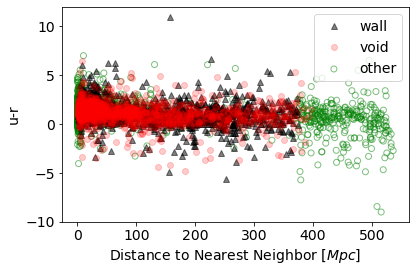

In [40]:
#3D method using h0=75

dwarf_wall = dwarf_table['vflag_VF']==0
dwarf_void = dwarf_table['vflag_VF']==1
dwarf_other = ~(dwarf_wall | dwarf_void)

plt.figure(tight_layout = True)
plt.plot(dwarf_table['3D_group_dist'][dwarf_wall], dwarf_table['u_r'][dwarf_wall], "k^", alpha = 0.5, label = 'wall')
plt.plot(dwarf_table['3D_group_dist'][dwarf_void], dwarf_table['u_r'][dwarf_void], "ro", alpha = 0.2, label = 'void')
plt.scatter(dwarf_table['3D_group_dist'][dwarf_other], dwarf_table['u_r'][dwarf_other], facecolors='none',
            edgecolors='g', alpha = 0.5, label = 'other')
plt.legend()
plt.xlabel('Distance to Nearest Neighbor [$Mpc]$')
plt.ylabel('u-r');
#plt.xlim(0, 2)
#plt.ylim(0,3)

3D method using h0=100h

(0.0, 3.0)

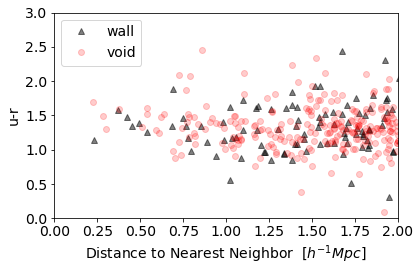

In [38]:
#3D method using h0=100h

dwarf_wall = dwarf_table['vflag_VF']==0
dwarf_void = dwarf_table['vflag_VF']==1
dwarf_other = ~(dwarf_wall | dwarf_void)

plt.figure(tight_layout = True)
plt.plot(dwarf_table['3D_group_dist_h'][dwarf_wall], dwarf_table['u_r'][dwarf_wall], "k^", alpha = 0.5, label = 'wall')
plt.plot(dwarf_table['3D_group_dist_h'][dwarf_void], dwarf_table['u_r'][dwarf_void], "ro", alpha = 0.2, label = 'void')
#plt.scatter(dwarf_table['3D_group_dist_h'][dwarf_other], dwarf_table['u_r'][dwarf_other], facecolors='none',
            #edgecolors='g', alpha = 0.5, label = 'other')
plt.legend()
plt.xlabel('Distance to Nearest Neighbor  [$h^{-1}Mpc]$')
plt.ylabel('u-r');
plt.xlim(0, 2)
plt.ylim(0,3)

3D vir using H0=75

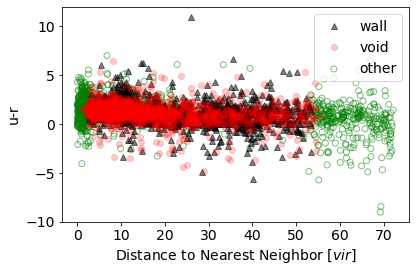

In [31]:
# 3D vir using H0=75

dwarf_wall = dwarf_table['vflag_VF']==0
dwarf_void = dwarf_table['vflag_VF']==1
dwarf_other = ~(dwarf_wall | dwarf_void)

plt.figure(tight_layout = True)
plt.plot(dwarf_table['3D_group_dist_vir'][dwarf_wall], dwarf_table['u_r'][dwarf_wall], "k^", alpha = 0.5, label = 'wall')
plt.plot(dwarf_table['3D_group_dist_vir'][dwarf_void], dwarf_table['u_r'][dwarf_void], "ro", alpha = 0.2, label = 'void')
plt.scatter(dwarf_table['3D_group_dist_vir'][dwarf_other], dwarf_table['u_r'][dwarf_other], facecolors='none',
            edgecolors='g', alpha = 0.5, label = 'other')
plt.legend()
plt.xlabel('Distance to Nearest Neighbor [$vir]$')
plt.ylabel('u-r');
#plt.xlim(0, 20)
#plt.ylim(0,3)

3D vir using H0=100h

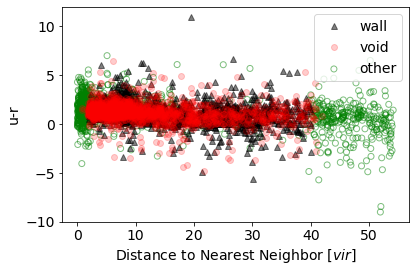

In [32]:
# 3D vir using H0=100h

dwarf_wall = dwarf_table['vflag_VF']==0
dwarf_void = dwarf_table['vflag_VF']==1
dwarf_other = ~(dwarf_wall | dwarf_void)

plt.figure(tight_layout = True)
plt.plot(dwarf_table['3D_group_dist_vir_h'][dwarf_wall], dwarf_table['u_r'][dwarf_wall], "k^", alpha = 0.5, label = 'wall')
plt.plot(dwarf_table['3D_group_dist_vir_h'][dwarf_void], dwarf_table['u_r'][dwarf_void], "ro", alpha = 0.2, label = 'void')
plt.scatter(dwarf_table['3D_group_dist_vir_h'][dwarf_other], dwarf_table['u_r'][dwarf_other], facecolors='none',
            edgecolors='g', alpha = 0.5, label = 'other')
plt.legend()
plt.xlabel('Distance to Nearest Neighbor [$vir]$')
plt.ylabel('u-r');
plt.xlim(0, 20)
plt.ylim(0,3)